<h1> Machine Learning Notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils import *

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [2]:
filepath = '/Users/efkanturedi/Corteze/untitled folder/nutri_clean_prod.csv'
data = pd.read_csv(filepath)

/Users/efkanturedi/opt/anaconda3/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data

,code,product_name,brands,nutriscore_grade,pnns_groups_1,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
0,0000000000100,moutarde au moût de raisin,courte paille,d,Fat and sauces,1000.0,8.2,2.2,29.0,22.0,0.0,5.1,4.60,18.0
1,0000000000949,Salade de carottes râpées,NaN,b,Composite foods,32.0,0.3,0.1,5.3,3.9,100.0,0.9,0.42,1.0
2,0000000001281,Tarte noix de coco,"Crous Resto',Crous",d,Sugary snacks,381.0,22.0,15.5,27.3,21.9,4.4,4.6,0.10,14.0
3,0000000001885,Compote de poire,Crous,a,Fruits and vegetables,157.0,0.0,0.0,36.0,27.0,3.6,0.6,0.00,-2.0
4,0000000002257,Salade de macedoine de légumes,NaN,b,Composite foods,143.0,12.7,1.0,3.9,1.0,100.0,1.9,0.27,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731716,9999991042742,Mousse au chocolat noir,NaN,d,unknown,346.0,27.0,17.0,19.0,18.0,100.0,6.0,0.19,17.0
731717,9999991149090,Riz parfumé,King Elephant,b,Cereals and potatoes,351.0,0.5,0.0,80.0,0.0,100.0,7.0,0.00,0.0
731718,9999999004360,Minis beignets,NaN,d,unknown,333.0,20.2,6.0,30.9,10.4,100.0,7.4,1.10,15.0
731719,9999999175305,Erdbeerkuchen 1019g tiefgefroren,Coppenrath & Wiese,d,Sugary snacks,1000.0,7.6,4.8,35.0,24.0,100.0,2.6,0.28,12.0


In [4]:
# Revove comment if you want to use only a sample of the dataset

#data = data.sample(n=200000,random_state=42)

In [5]:
# We add the code to use it as primary key
X_cols = [
  'energy-kcal_100g',
  #'fat_100g',
  'saturated-fat_100g',
  #'carbohydrates_100g',
  'sugars_100g',
  'fiber_100g',
  'proteins_100g',
  'salt_100g',
]

In [6]:
X = data[X_cols].reset_index(drop=True)
y = data[[
  'nutrition-score-fr_100g',
  'nutriscore_grade'
]].reset_index(drop=True)

In [7]:
y

,nutrition-score-fr_100g,nutriscore_grade
0,18.0,d
1,1.0,b
2,14.0,d
3,-2.0,a
4,1.0,b
...,...,...
731716,17.0,d
731717,0.0,b
731718,15.0,d
731719,12.0,d


<h3> Some Plots

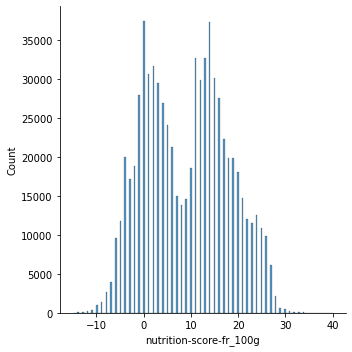

In [8]:
sns.displot(y['nutrition-score-fr_100g']);

<h3> Standardising & Normalizing the data

In [9]:
# Creating Training and Test set
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)

# Creating Validation set
# X_train, y_train, X_val, y_val = train_test_split(X_train, y_train, train_size=0.9)

In [10]:
X_test

,energy-kcal_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
195736,0.0,0.0,0.00,100.0,0.00,100.000
716924,48.0,0.2,2.10,0.9,0.70,0.660
89674,333.0,0.0,56.41,0.0,0.00,0.000
583325,288.0,0.8,2.00,5.4,11.00,1.200
441546,46.0,1.0,4.80,100.0,3.20,0.100
...,...,...,...,...,...,...
598572,1000.0,0.0,15.30,0.0,1.52,0.053
482408,620.0,32.0,1.00,14.0,14.00,0.000
292297,150.0,3.0,0.50,100.0,21.00,0.110
655690,915.0,1.3,43.80,100.0,0.60,0.000


In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<h3> Running the models

In [12]:
import math
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score

<h5> Dummy regressor

In [13]:
results = pd.DataFrame(columns=['Model','RMSE','R2','Adj R2'])
n = X_test.shape[0]
p = y_test.shape[1]-1

In [14]:
dummy_reg = DummyRegressor(strategy="mean")
dummy_reg.fit(X_train,y_train['nutrition-score-fr_100g'])

DummyRegressor()

In [15]:
dummy_rmse = math.sqrt(mean_squared_error(dummy_reg.predict(X_test), y_test['nutrition-score-fr_100g']))
dummy_r2 = r2_score(dummy_reg.predict(X_test), y_test['nutrition-score-fr_100g'])

In [16]:
results = results.append({
  'Model':'DummyRegressor',
  'RMSE':dummy_rmse,
  'R2': dummy_r2,
  'Adj R2':1-((1-dummy_r2)*(n-1)/(n-p-1))
},ignore_index=True)

results

,Model,RMSE,R2,Adj R2
0,DummyRegressor,8.859702,-2.763983e+30,-2.764002e+30


<h5> Linear Model

In [17]:
elastic_net = ElasticNetCV()
elastic_net.fit(X_train,y_train['nutrition-score-fr_100g'])

ElasticNetCV()

In [18]:
elastic_net_rmse = math.sqrt(mean_squared_error(elastic_net.predict(X_test), y_test['nutrition-score-fr_100g']))
elastic_net_r2 = r2_score(elastic_net.predict(X_test), y_test['nutrition-score-fr_100g'])

In [19]:
results = results.append({
  'Model':'Elastic Net',
  'RMSE':elastic_net_rmse,
  'R2':elastic_net_r2,
  'Adj R2' : 1-((1-elastic_net_r2)*(n-1)/(n-p-1))
},ignore_index=True)

results

,Model,RMSE,R2,Adj R2
0,DummyRegressor,8.859702,-2.763983e+30,-2.764002e+30
1,Elastic Net,7.082510,-7.710230e-01,-7.710351e-01


<h5> Random Forest

In [20]:
rfr = RandomForestRegressor(n_jobs=-1)
rfr.fit(X_train,y_train['nutrition-score-fr_100g'])

RandomForestRegressor(n_jobs=-1)

In [21]:
rfr_rmse = math.sqrt(mean_squared_error(rfr.predict(X_test), y_test['nutrition-score-fr_100g']))
rfr_r2 = r2_score(rfr.predict(X_test), y_test['nutrition-score-fr_100g'])

In [22]:
results = results.append({
  'Model':'Random Forest',
  'RMSE':rfr_rmse,
  'R2':rfr_r2,
  'Adj R2': 1-((1-rfr_r2)*(n-1)/(n-p-1))
},ignore_index=True)

results

,Model,RMSE,R2,Adj R2
0,DummyRegressor,8.859702,-2.763983e+30,-2.764002e+30
1,Elastic Net,7.082510,-7.710230e-01,-7.710351e-01
2,Random Forest,1.964790,9.486147e-01,9.486144e-01


<h5> XGBoost

In [23]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train['nutrition-score-fr_100g'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [24]:
xgb_rmse = math.sqrt(mean_squared_error(xgb.predict(X_test), y_test['nutrition-score-fr_100g']))
xgb_r2 = r2_score(xgb.predict(X_test), y_test['nutrition-score-fr_100g'])

In [25]:
results = results.append({
  'Model':'XGBoost',
  'RMSE':xgb_rmse,
  'R2':xgb_r2,
  'Adj R2':1-((1-xgb_r2)*(n-1)/(n-p-1))
},ignore_index=True)

results

,Model,RMSE,R2,Adj R2
0,DummyRegressor,8.859702,-2.763983e+30,-2.764002e+30
1,Elastic Net,7.082510,-7.710230e-01,-7.710351e-01
2,Random Forest,1.964790,9.486147e-01,9.486144e-01
3,XGBoost,2.126870,9.389243e-01,9.389239e-01


<h3>GridSearchCV on Random Forest and XGBoost:

In [26]:
xgb_parameters = {
  'n_estimators':[2000,3000],
  'learning_rate': [0.2,0.3]
}

In [27]:
xgb_grid = GridSearchCV(estimator = XGBRegressor(), 
                      scoring='neg_root_mean_squared_error',
                      param_grid = xgb_parameters,
                      cv=3,
                      verbose=False
)

xgb_grid.fit(X_train, y_train['nutrition-score-fr_100g'])

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
       

In [28]:
xgb_best_params_ = xgb_grid.best_params_
xgb_best_params_

{'learning_rate': 0.2, 'n_estimators': 3000}

In [29]:
xgb_opt = xgb_grid.best_estimator_

In [30]:
xgb_opt_rmse = math.sqrt(mean_squared_error(xgb_opt.predict(X_test), y_test['nutrition-score-fr_100g']))
xgb_opt_r2 = r2_score(xgb_opt.predict(X_test), y_test['nutrition-score-fr_100g'])

results = results.append({
  'Model':'XGBoost Hypt',
  'RMSE':xgb_opt_rmse,
  'R2':xgb_opt_r2,
  'Adj R2':1-((1-xgb_opt_r2)*(n-1)/(n-p-1))
},ignore_index=True)

results

,Model,RMSE,R2,Adj R2
0,DummyRegressor,8.859702,-2.763983e+30,-2.764002e+30
1,Elastic Net,7.082510,-7.710230e-01,-7.710351e-01
2,Random Forest,1.964790,9.486147e-01,9.486144e-01
3,XGBoost,2.126870,9.389243e-01,9.389239e-01
4,XGBoost Hypt,1.947493,9.494804e-01,9.494801e-01


In [31]:
rfr_parameters = {
  'n_estimators': [1000],
  #'n_estimators': [200,500,1000],
}

In [32]:
rfr_grid = GridSearchCV(estimator = RandomForestRegressor(n_jobs=-1), 
                      scoring='neg_root_mean_squared_error',
                      param_grid = rfr_parameters,
                      cv=3,
                      verbose=False
                     )

rfr_grid.fit(X_train, y_train['nutrition-score-fr_100g'])

GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'n_estimators': [1000]},
             scoring='neg_root_mean_squared_error', verbose=False)

In [33]:
rfr_best_params_ = rfr_grid.best_params_
rfr_best_params_

{'n_estimators': 1000}

In [34]:
rfr_opt = rfr_grid.best_estimator_

In [35]:
rfr_opt_rmse = math.sqrt(mean_squared_error(rfr_opt.predict(X_test), y_test['nutrition-score-fr_100g']))
rfr_opt_r2 = r2_score(rfr_opt.predict(X_test), y_test['nutrition-score-fr_100g'])

results = results.append({
  'Model':'Random Forest Hypt',
  'RMSE':rfr_opt_rmse,
  'R2':rfr_opt_r2,
  'Adj R2':1-((1-rfr_opt_r2)*(n-1)/(n-p-1))
},ignore_index=True)

results

,Model,RMSE,R2,Adj R2
0,DummyRegressor,8.859702,-2.763983e+30,-2.764002e+30
1,Elastic Net,7.082510,-7.710230e-01,-7.710351e-01
2,Random Forest,1.964790,9.486147e-01,9.486144e-01
3,XGBoost,2.126870,9.389243e-01,9.389239e-01
4,XGBoost Hypt,1.947493,9.494804e-01,9.494801e-01
5,Random Forest Hypt,1.957672,9.489627e-01,9.489624e-01


In [36]:
min(rfr_opt_rmse,xgb_opt_rmse)

1.9474931744055808

In [37]:
if rfr_rmse < xgb_rmse:
  rgr_opt = rfr
else:
  rgr_opt = xgb

We assume to pick Random Forest as our main model. Lets transform our numbers into letters, and then use recall and precision to evaluate our model performance.

In [38]:
y_pred = rgr_opt.predict(X_test)

In [39]:
y_test

,nutrition-score-fr_100g,nutriscore_grade
195736,0.0,a
716924,2.0,b
89674,14.0,d
583325,-2.0,a
441546,0.0,b
...,...,...
598572,3.0,c
482408,12.0,d
292297,-2.0,a
655690,19.0,e


In [40]:
d = {'y_pred': y_pred, 'y_true': y_test['nutrition-score-fr_100g'], 'y_original_grade':y_test['nutriscore_grade']}
df = pd.DataFrame(data = d)
df

,y_pred,y_true,y_original_grade
195736,1.100586,0.0,a
716924,2.441250,2.0,b
89674,14.000000,14.0,d
583325,-2.000000,-2.0,a
441546,0.064123,0.0,b
...,...,...,...
598572,3.140000,3.0,c
482408,12.000000,12.0,d
292297,-2.000000,-2.0,a
655690,14.690000,19.0,e


In [41]:
df['y_pred_grade'] = df.y_pred.apply(lambda x: grader_food(x))
df['y_true_grade'] = df.y_true.apply(lambda x: grader_food(x))

In [42]:
df

,y_pred,y_true,y_original_grade,y_pred_grade,y_true_grade
195736,1.100586,0.0,a,b,b
716924,2.441250,2.0,b,c,b
89674,14.000000,14.0,d,d,d
583325,-2.000000,-2.0,a,a,a
441546,0.064123,0.0,b,b,b
...,...,...,...,...,...
598572,3.140000,3.0,c,c,c
482408,12.000000,12.0,d,d,d
292297,-2.000000,-2.0,a,a,a
655690,14.690000,19.0,e,d,e


In [43]:
from sklearn.metrics import confusion_matrix,classification_report

In [44]:
labels = ['a','b','c','d','e']

In [45]:
cf_matrix = confusion_matrix(df['y_original_grade'],df['y_pred_grade'],labels=labels)

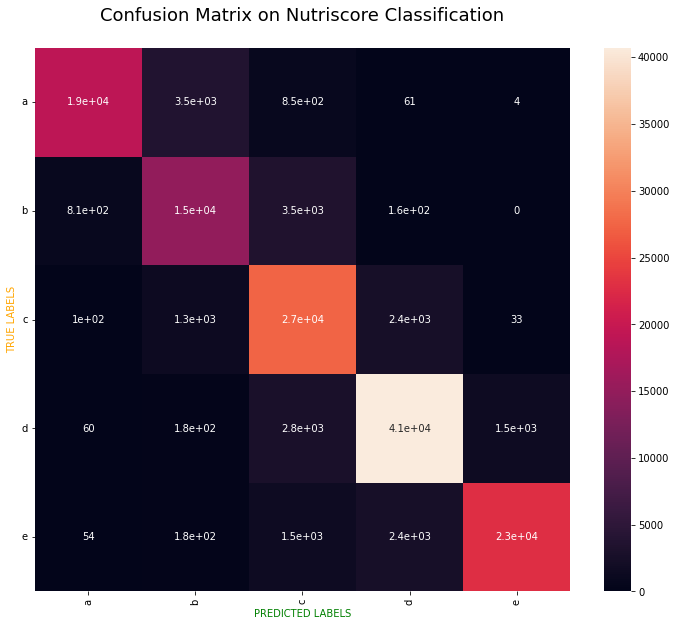

In [46]:
fig = plt.figure(figsize=(12,10))
ax = sns.heatmap(cf_matrix, annot=True)
ax.set_xlabel("PREDICTED LABELS", color="g")
ax.set_ylabel("TRUE LABELS", color="orange")
ax.xaxis.set_ticklabels(labels, 
                        rotation='vertical')
ax.yaxis.set_ticklabels(labels,
                        rotation='horizontal')
plt.title("Confusion Matrix on Nutriscore Classification\n",
          fontsize=18)
plt.show()

In [47]:
print(classification_report(df['y_original_grade'],df['y_pred_grade'],target_names=labels))

              precision    recall  f1-score   support

           a       0.95      0.81      0.87     23423
           b       0.74      0.77      0.76     19283
           c       0.76      0.88      0.82     31324
           d       0.89      0.90      0.89     45272
           e       0.94      0.85      0.89     27043

    accuracy                           0.85    146345
   macro avg       0.86      0.84      0.85    146345
weighted avg       0.86      0.85      0.86    146345



<h3> Exporting the pipeline of model

In [48]:
from sklearn.pipeline import Pipeline
import pickle

In [49]:
pipeline = Pipeline([
    ('standard_scaler', scaler), 
    ('model', rgr_opt)
])

In [50]:
with open('/Users/efkanturedi/Corteze/untitled folder/model.pickle', 'wb') as model_file:
  pickle.dump(pipeline, model_file)